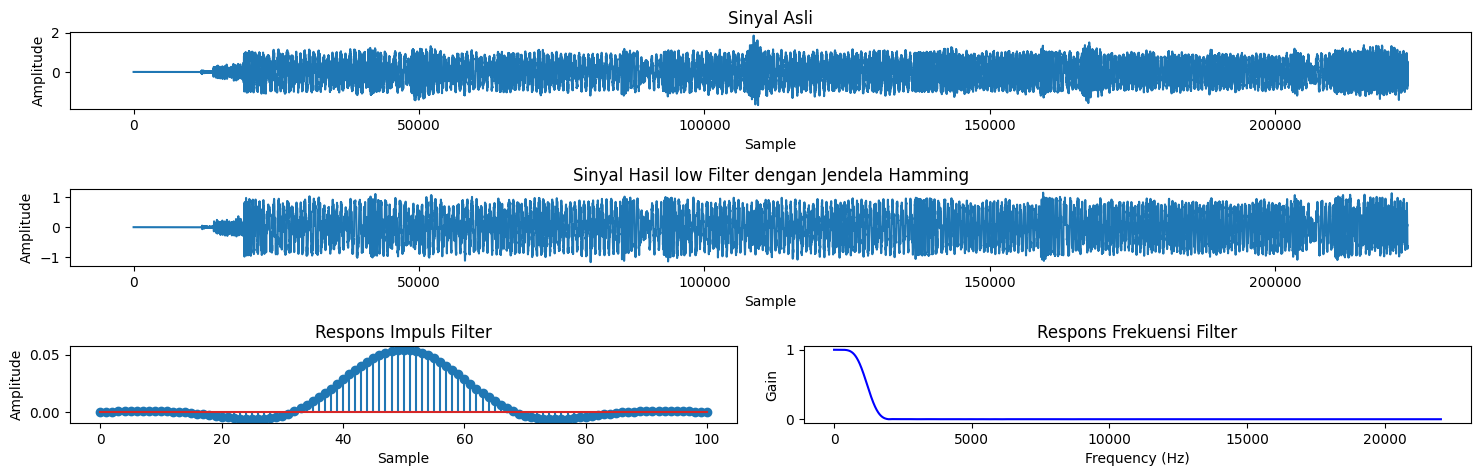

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_hamming_low_fir.wav


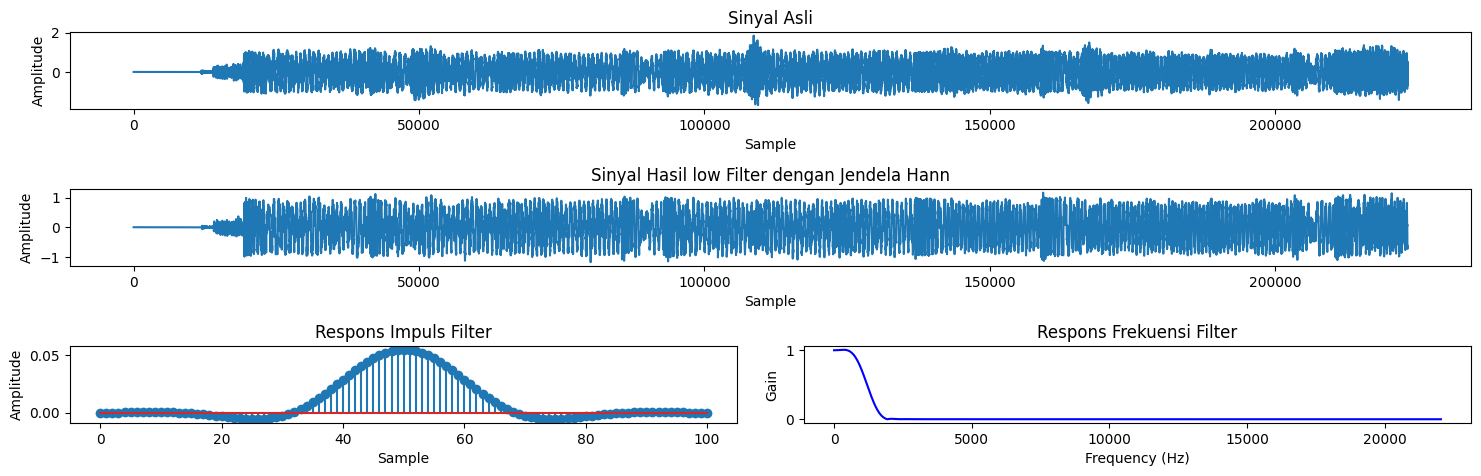

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_hann_low_fir.wav


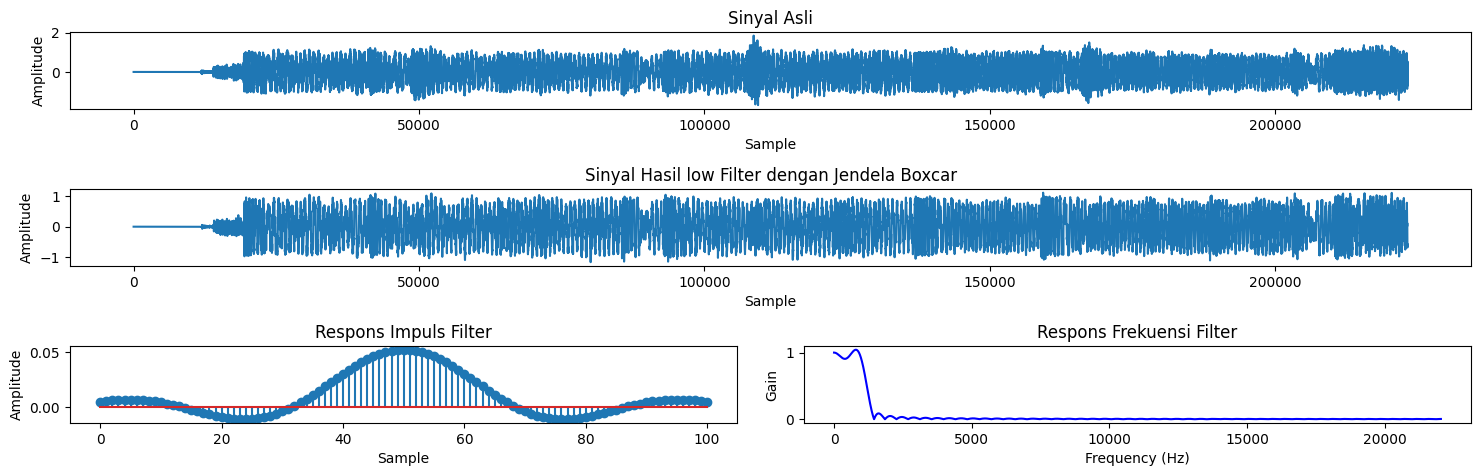

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_boxcar_low_fir.wav


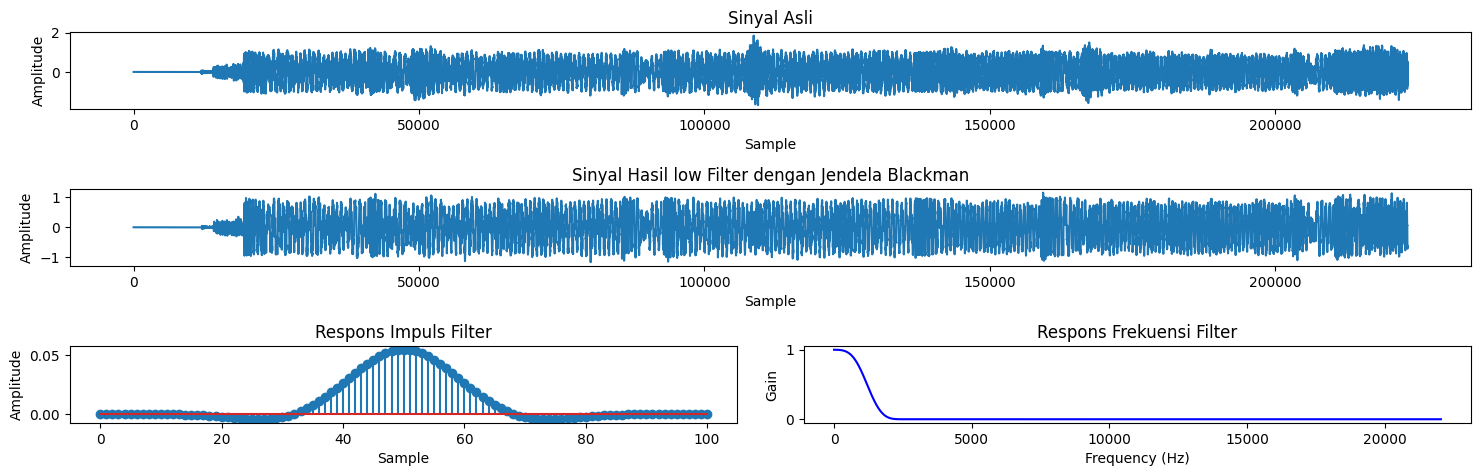

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_blackman_low_fir.wav


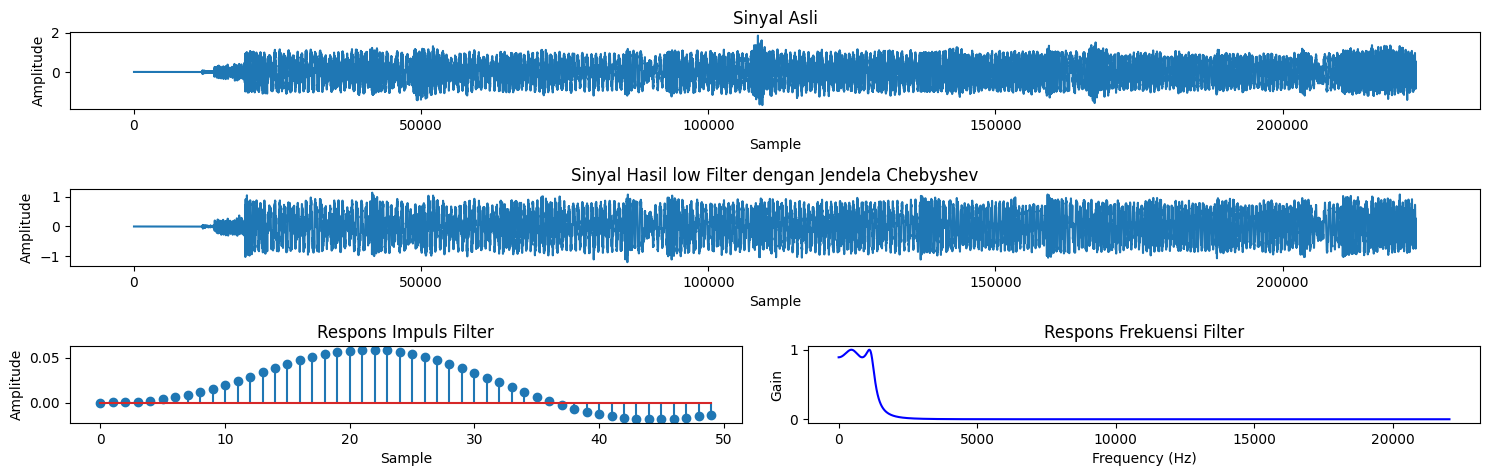

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_chebyshev_low_iir.wav


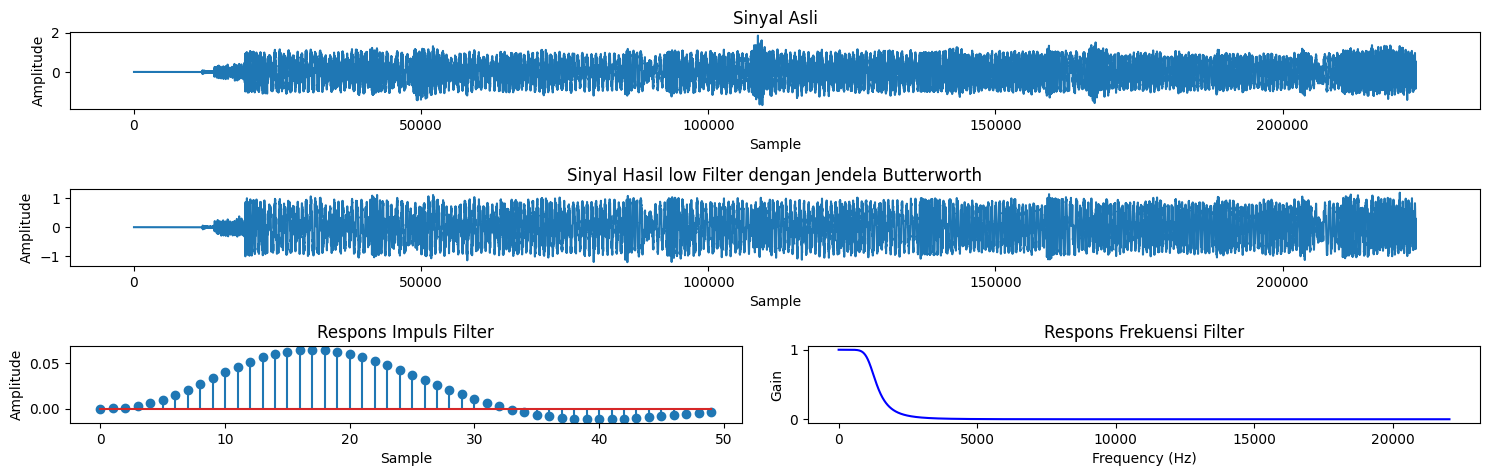

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_butterworth_low_iir.wav


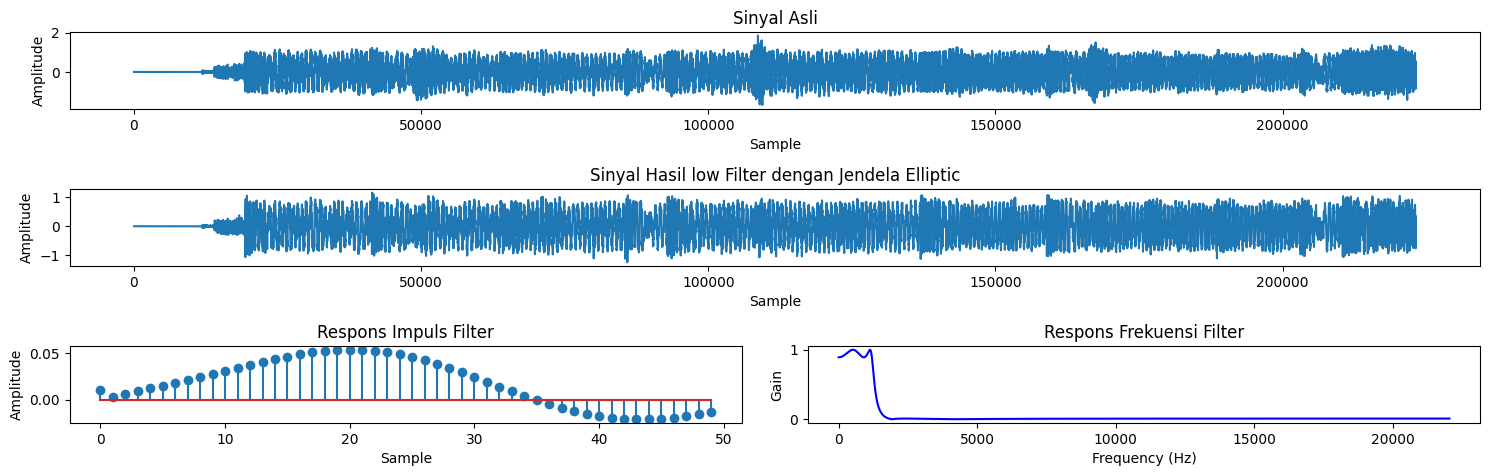

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_elliptic_low_iir.wav


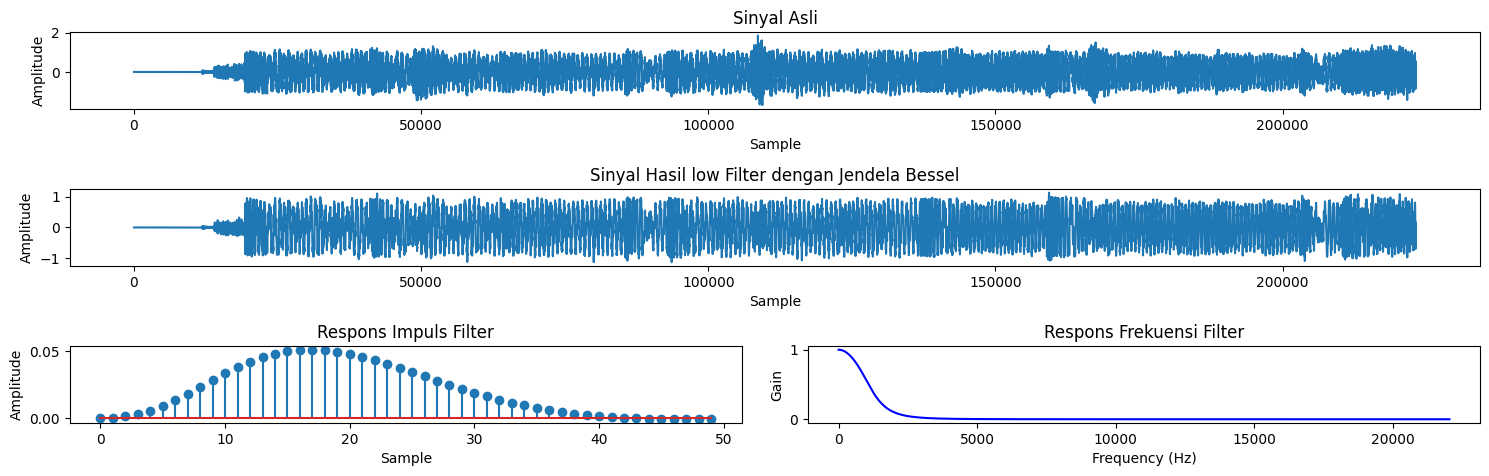

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_bessel_low_iir.wav


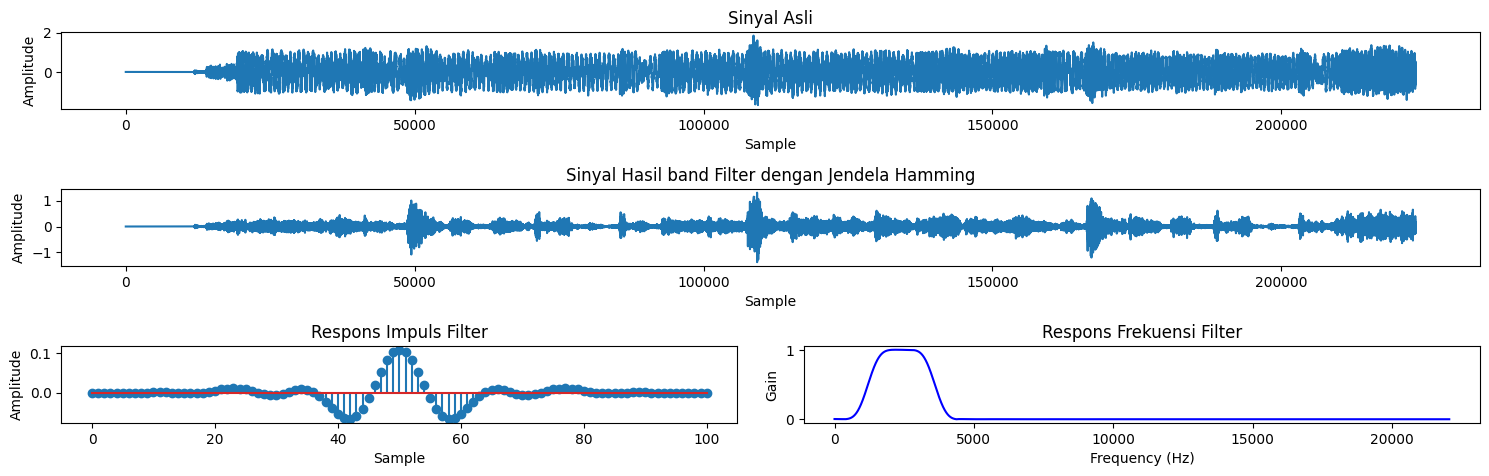

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_hamming_band_fir.wav


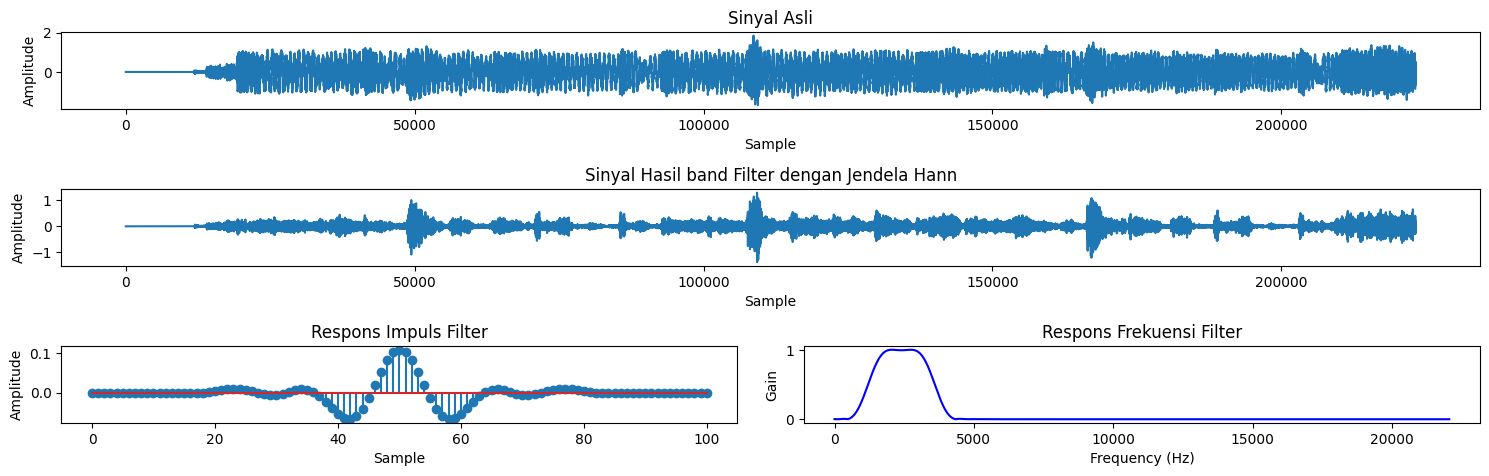

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_hann_band_fir.wav


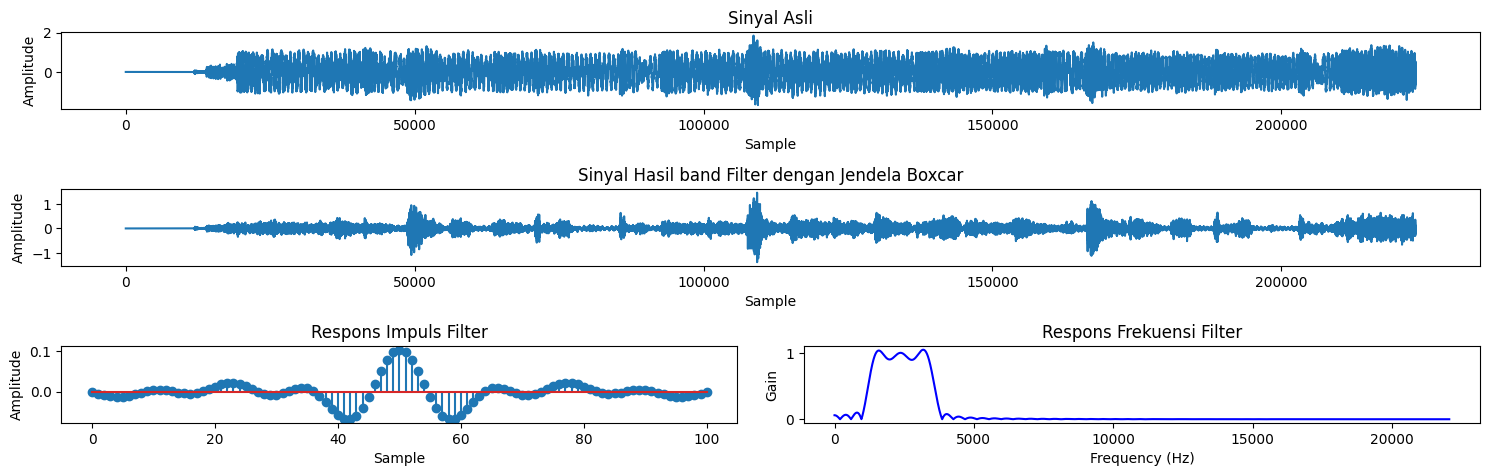

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_boxcar_band_fir.wav


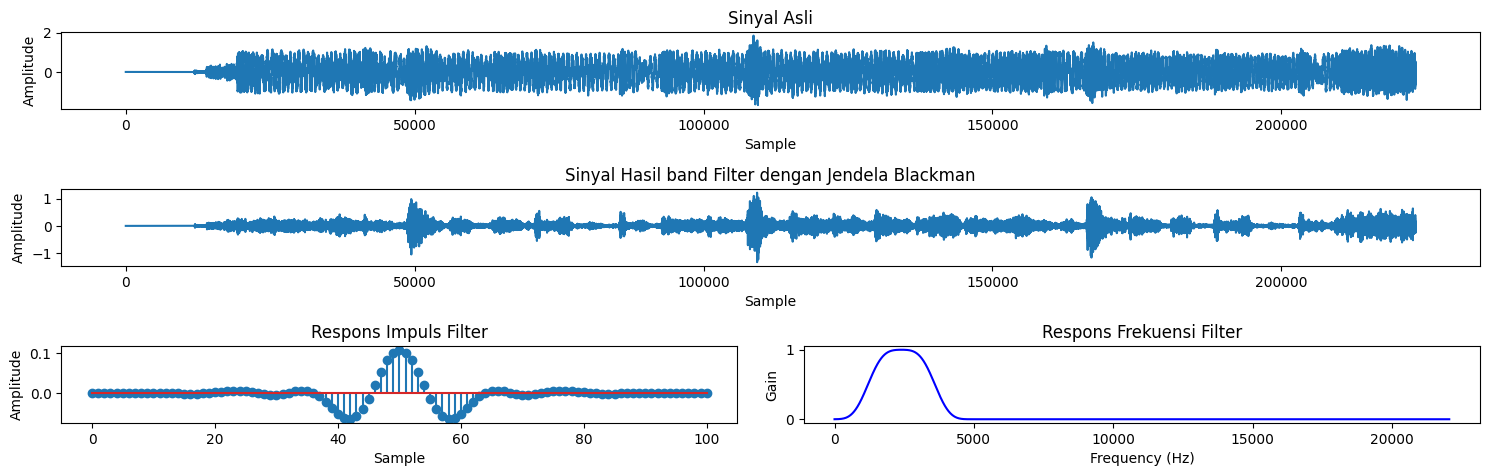

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_blackman_band_fir.wav


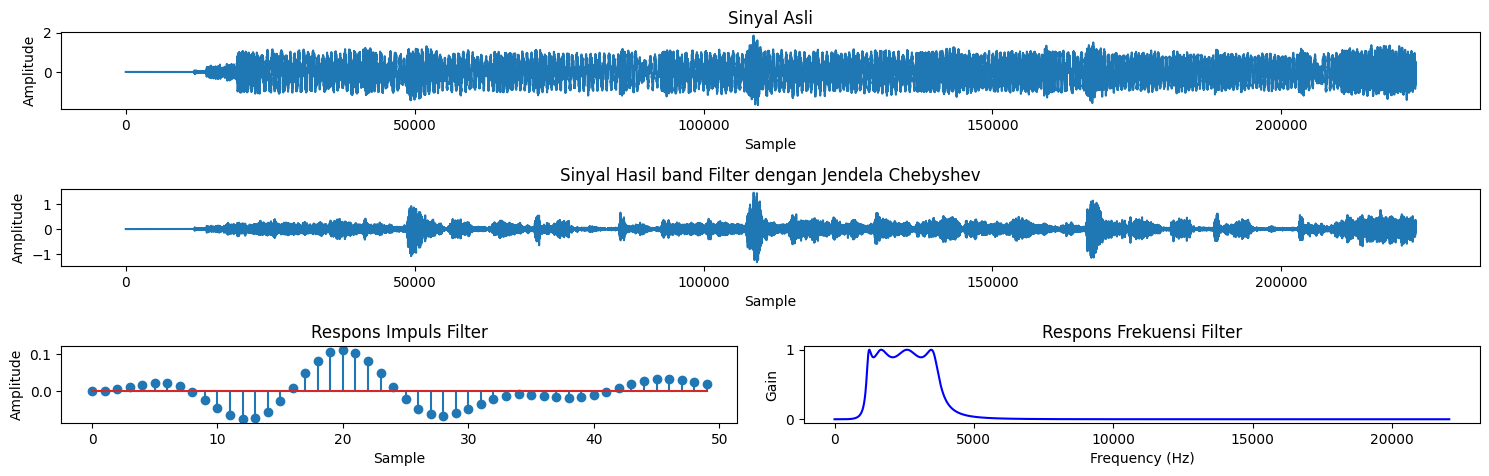

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_chebyshev_band_iir.wav


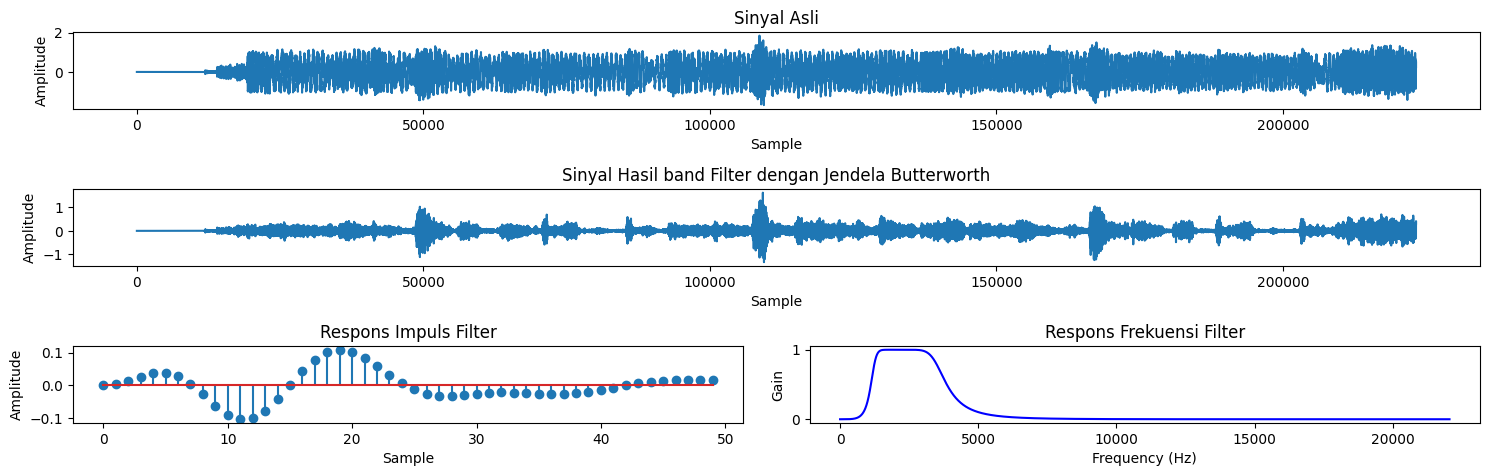

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_butterworth_band_iir.wav


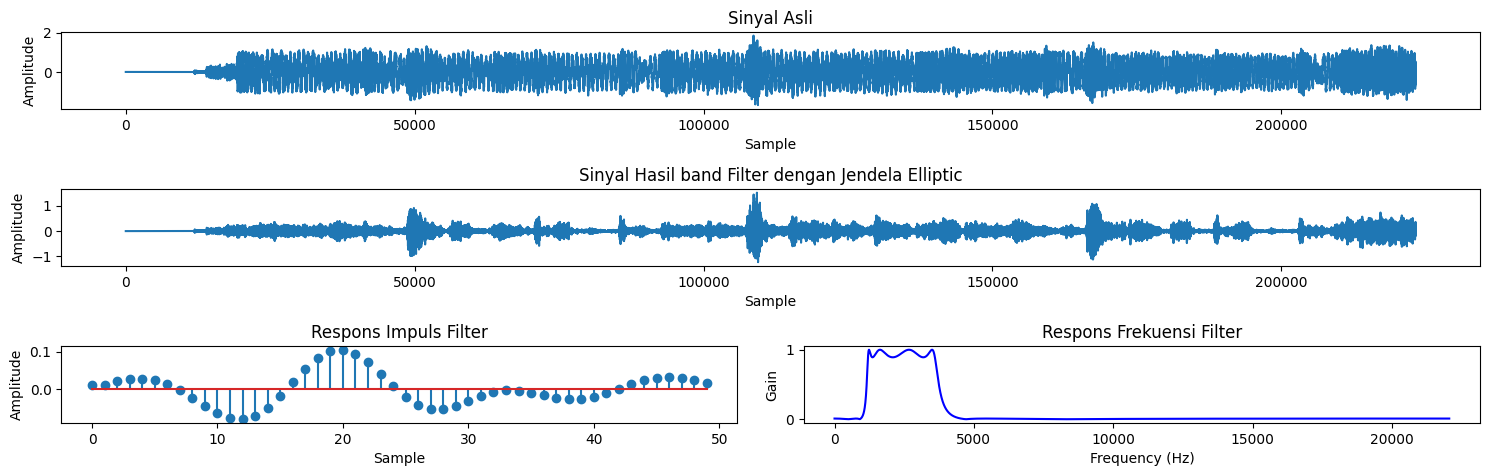

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_elliptic_band_iir.wav


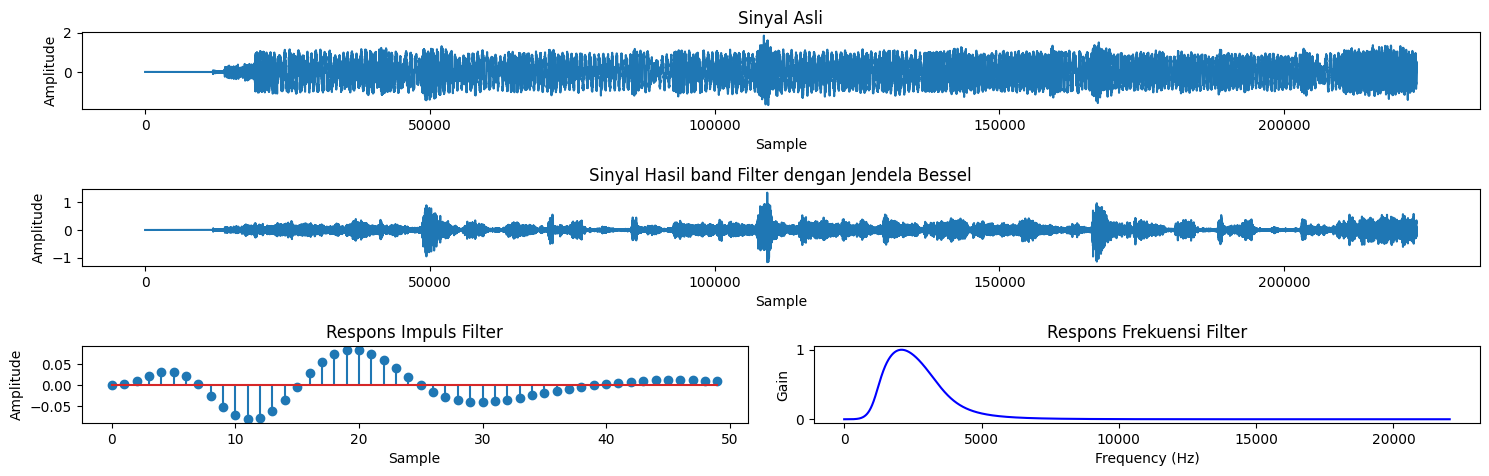

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_bessel_band_iir.wav


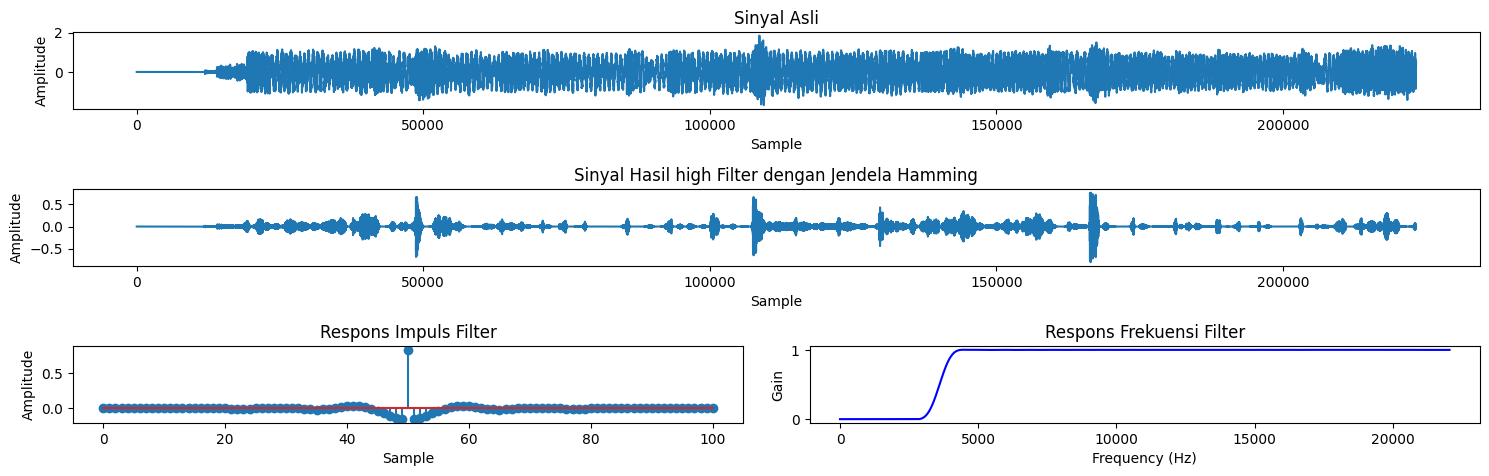

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_hamming_high_fir.wav


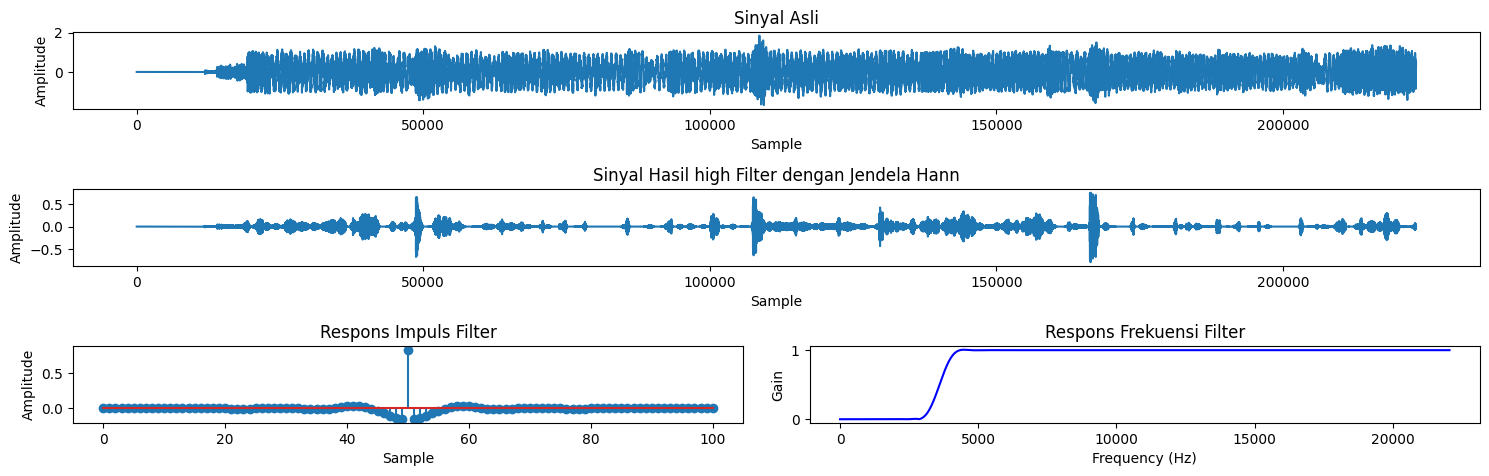

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_hann_high_fir.wav


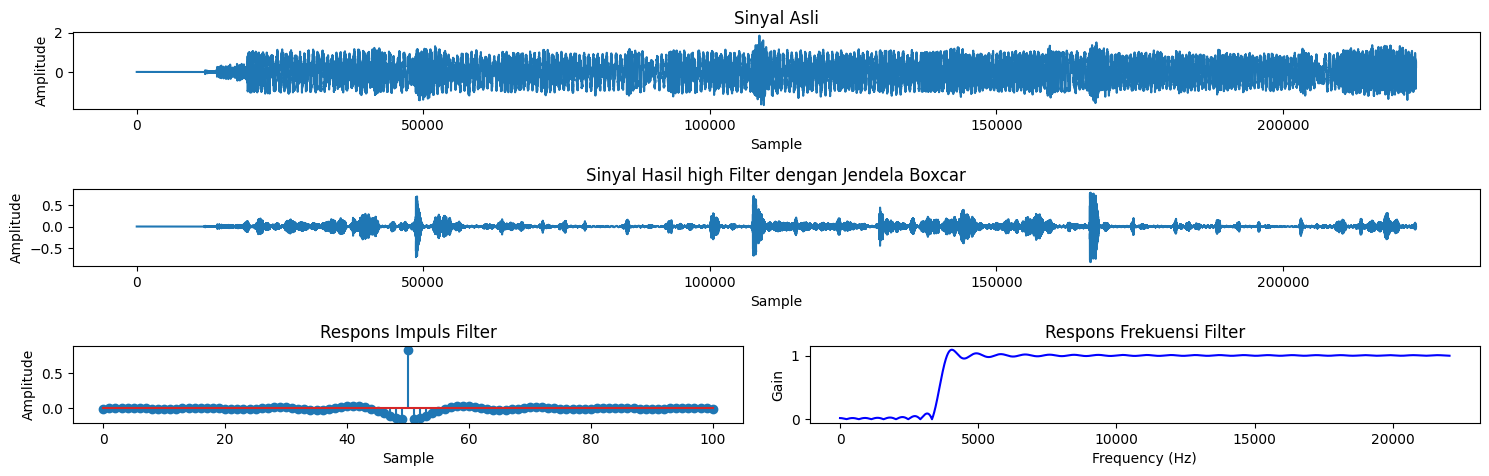

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_boxcar_high_fir.wav


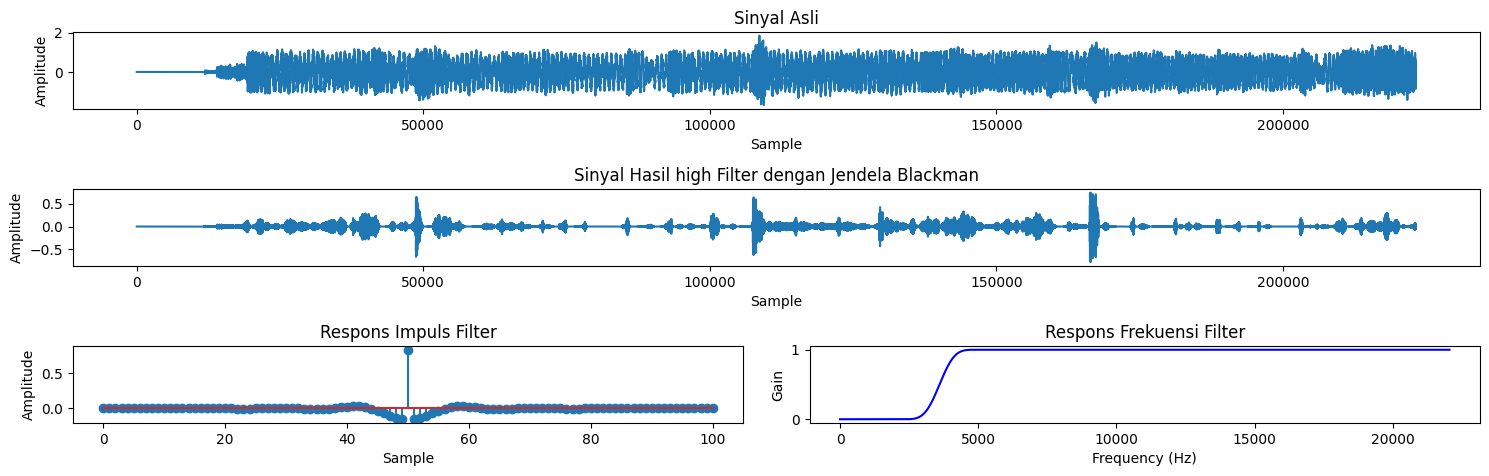

Sinyal hasil filter FIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_blackman_high_fir.wav


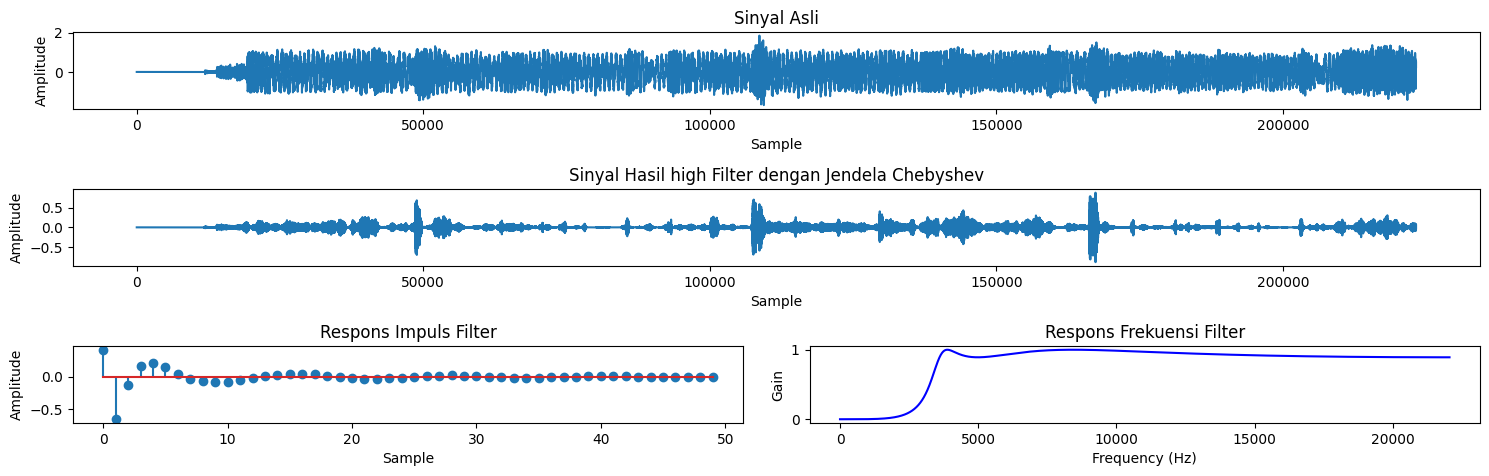

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_chebyshev_high_iir.wav


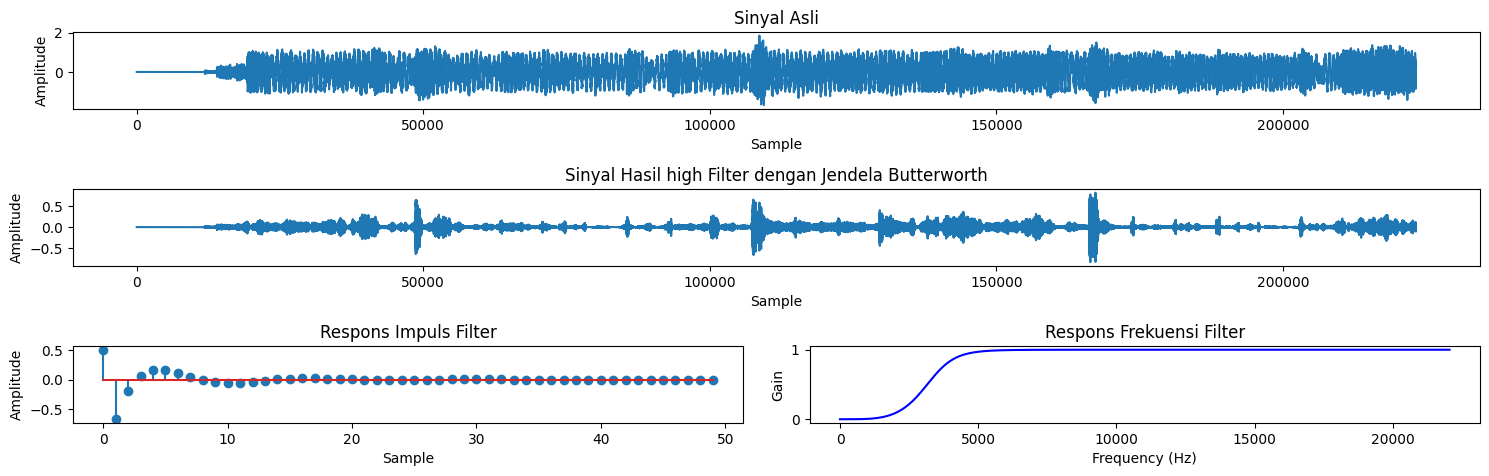

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_butterworth_high_iir.wav


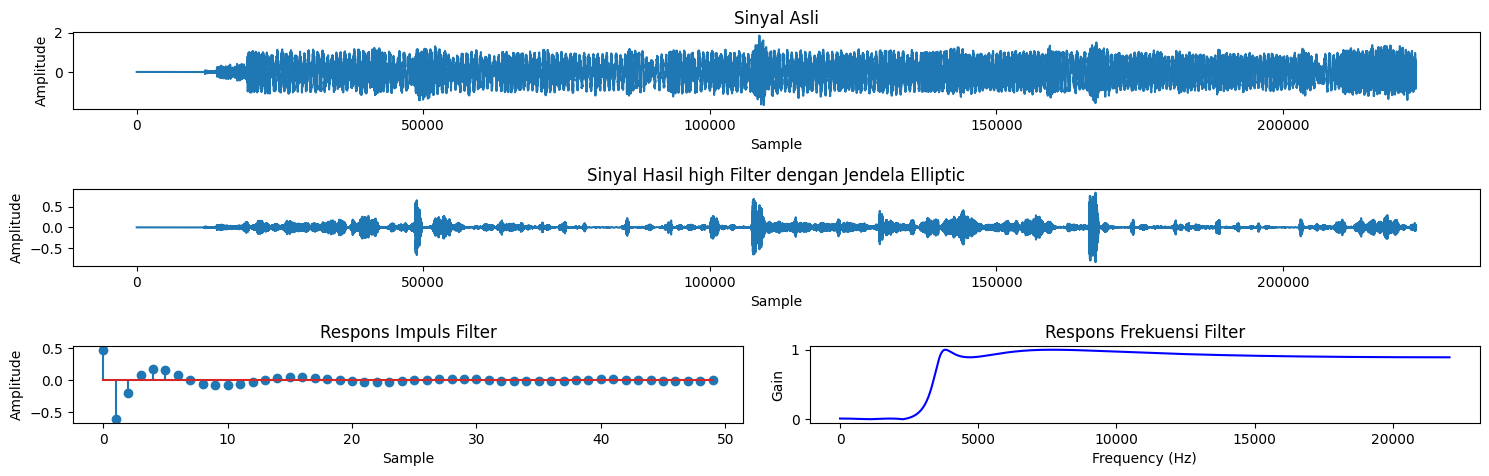

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_elliptic_high_iir.wav


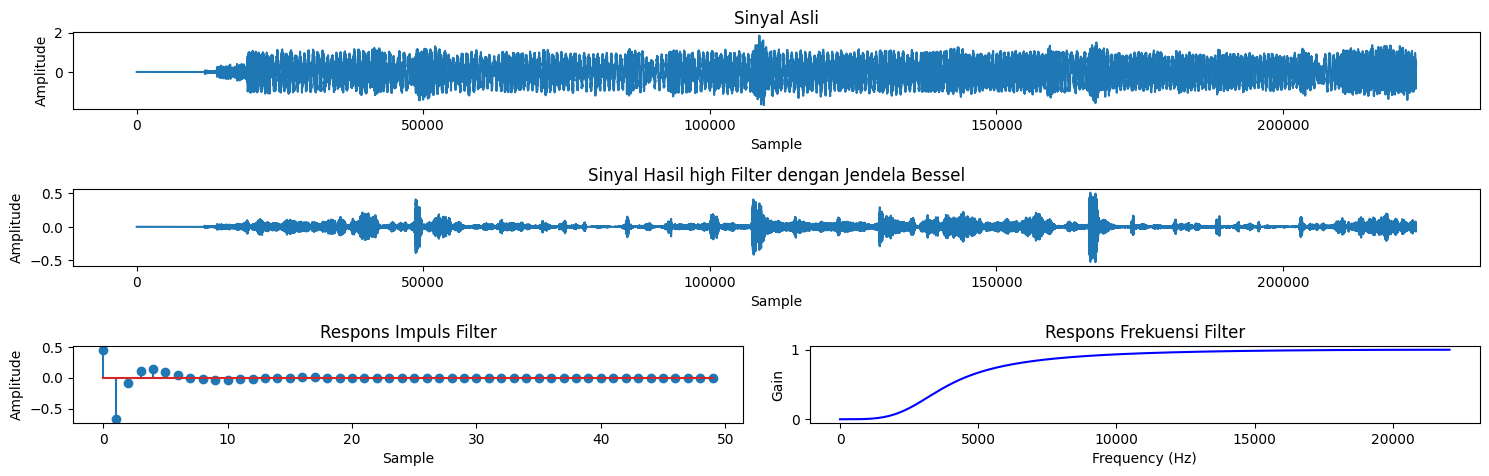

Sinyal hasil filter IIR disimpan di: D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\filtered_bessel_high_iir.wav


In [1]:
import numpy as np
import scipy.signal as signal
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import os

def read_audio(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File tidak ditemukan: {file_path}")
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def apply_fir_filter(data, numtaps, cutoff, pass_type, window, fs):
    if pass_type == 'low':
        fir_coeff = signal.firwin(numtaps, cutoff, window=window, fs=fs)
    elif pass_type == 'band':
        fir_coeff = signal.firwin(numtaps, cutoff, pass_zero=False, window=window, fs=fs)
    elif pass_type == 'high':
        fir_coeff = signal.firwin(numtaps, cutoff, pass_zero=False, window=window, fs=fs)
    else:
        raise ValueError(f"Filter type {pass_type} not supported.")
    filtered_signal = signal.lfilter(fir_coeff, 1.0, data)
    return filtered_signal, fir_coeff

def apply_iir_filter(data, cutoff, pass_type, filter_type, order, fs, rp=None, rs=None):
    nyquist = 0.5 * fs
    normalized_cutoff = [c / nyquist for c in cutoff] if isinstance(cutoff, list) else cutoff / nyquist

    if filter_type == 'chebyshev':
        b, a = signal.cheby1(order, rp, normalized_cutoff, btype=pass_type)
    elif filter_type == 'butterworth':
        b, a = signal.butter(order, normalized_cutoff, btype=pass_type)
    elif filter_type == 'elliptic':
        b, a = signal.ellip(order, rp, rs, normalized_cutoff, btype=pass_type)
    elif filter_type == 'bessel':
        b, a = signal.bessel(order, normalized_cutoff, btype=pass_type)
    else:
        raise ValueError(f"Filter type {filter_type} not supported.")

    filtered_signal = signal.lfilter(b, a, data)
    return filtered_signal, (b, a)

def save_audio(file_path, signal, sr):
    sf.write(file_path, signal, sr)

def plot_signals(original, filtered, sr, filter_type, window, filter_coeff):
    plt.figure(figsize=(15, 6))
    plt.subplot(4, 1, 1)
    plt.plot(original)
    plt.title('Sinyal Asli')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(4, 1, 2)
    plt.plot(filtered)
    plt.title(f'Sinyal Hasil {filter_type} Filter dengan Jendela {window.capitalize()}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # Plot respons impuls
    plt.subplot(4, 2, 5)
    if isinstance(filter_coeff, tuple):
        b, a = filter_coeff
        impulse = np.zeros(50)
        impulse[0] = 1
        response = signal.lfilter(b, a, impulse)
        plt.stem(response)
    else:
        plt.stem(filter_coeff)
    plt.title('Respons Impuls Filter')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # Plot respons frekuensi
    plt.subplot(4, 2, 6)
    if isinstance(filter_coeff, tuple):
        w, h = signal.freqz(*filter_coeff, worN=8000)
    else:
        w, h = signal.freqz(filter_coeff, worN=8000)
    plt.plot(0.5 * sr * w / np.pi, np.abs(h), 'b')
    plt.title('Respons Frekuensi Filter')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')

    plt.tight_layout()
    plt.show()

def main():
    # Parameter untuk filter low-pass FIR dengan jendela Hanning
    file_path = r'D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\Song Cut.wav'
    output_folder = r'D:\Kampus\Project\Python\Tugas\Tapis\PSD_DesainFilterdenganJendela\Tugas Akhir\Filtered'
    try:
        y, sr = read_audio(file_path)
    except FileNotFoundError as e:
        print(e)
        return

    numtaps = 101
    low = 1200
    high = 3600
    cutoffs = [low, [low, high], high]
    windows = ['hamming', 'hann', 'boxcar', 'blackman']
    iir_filters = ['chebyshev', 'butterworth', 'elliptic', 'bessel']
    pass_types = ['low', 'band', 'high']

    for pass_type, cutoff in zip(pass_types, cutoffs):
        for window in windows:
            filtered_signal, fir_coeff = apply_fir_filter(y, numtaps, cutoff, pass_type, window, sr)
            output_file = os.path.join(output_folder, f'filtered_{window}_{pass_type}_fir.wav')
            save_audio(output_file, filtered_signal, sr)
            plot_signals(y, filtered_signal, sr, pass_type, window, fir_coeff)
            print(f"Sinyal hasil filter FIR disimpan di: {output_file}")

        for filter_type in iir_filters:
            order = 4  # Or any suitable order for the IIR filter
            rp, rs = 1, 40  # Example values for ripple and attenuation
            filtered_signal, iir_coeff = apply_iir_filter(y, cutoff, pass_type, filter_type, order, sr, rp, rs)
            output_file = os.path.join(output_folder, f'filtered_{filter_type}_{pass_type}_iir.wav')
            save_audio(output_file, filtered_signal, sr)
            plot_signals(y, filtered_signal, sr, pass_type, filter_type, iir_coeff)
            print(f"Sinyal hasil filter IIR disimpan di: {output_file}")

if __name__ == '__main__':
    main()